# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
#!pip install citipy requests pandas matplotlib


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# api_keys.py
weather_api_key = "8a484831a40356e05ddaa84dd3181e91"


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Now you can use weather_api_key in your requests
print(f"Your API key is: {weather_api_key}")

Your API key is: 8a484831a40356e05ddaa84dd3181e91


In [5]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

SyntaxError: invalid syntax (2843405579.py, line 24)

In [6]:
import requests
import time

# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    #city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Display the collected data
for data in city_data:
    print(data)


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tazovsky
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | bereznik
Processing Record 4 of Set 1 | chonchi
Processing Record 5 of Set 1 | pointe-du-lac
Processing Record 6 of Set 1 | afaahiti
Processing Record 7 of Set 1 | vila franca do campo
Processing Record 8 of Set 1 | tateyama
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | oppdal
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | fale old settlement
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | corralillo
Processing Record 17 of Set 1 | glace bay
Processing Record 18 of Set 1 | castillos
Processing Record 19 of Set 1 | bardai
Processing Record 20 of Set 1 | tual
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | mitsamiouli
Processing Re

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazovsky,67.4667,78.7000,280.46,82,35,5.61,RU,1723080263
1,albany,42.6001,-73.9662,292.55,67,2,1.47,US,1723080264
2,bereznik,62.8551,42.7072,287.48,74,100,1.56,RU,1723080265
3,chonchi,-42.6128,-73.8092,277.71,97,24,0.45,CL,1723080266
4,pointe-du-lac,46.2869,-72.6845,294.10,73,0,1.54,CA,1723080267


In [8]:
city_data_df.shape

(576, 9)

In [9]:
# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\nawri\OneDrive\Desktop\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,280.46,82,35,5.61,RU,1723080263
1,albany,42.6001,-73.9662,292.55,67,2,1.47,US,1723080264
2,bereznik,62.8551,42.7072,287.48,74,100,1.56,RU,1723080265
3,chonchi,-42.6128,-73.8092,277.71,97,24,0.45,CL,1723080266
4,pointe-du-lac,46.2869,-72.6845,294.10,73,0,1.54,CA,1723080267


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

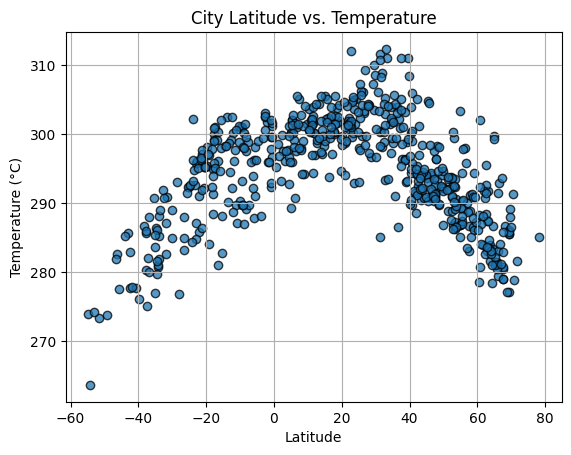

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='k', alpha=0.75, linewidth=1)


# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

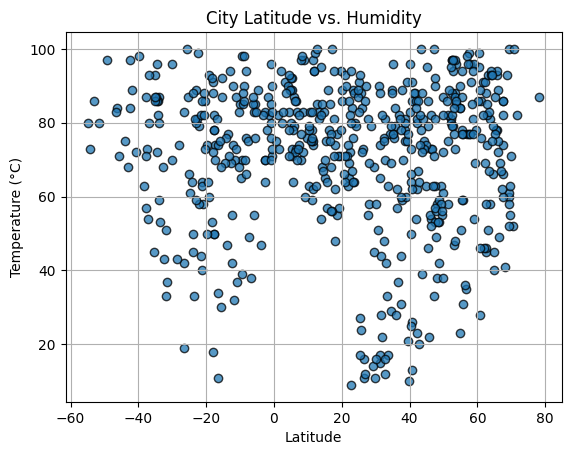

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='k', alpha=0.75, linewidth=1)


# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

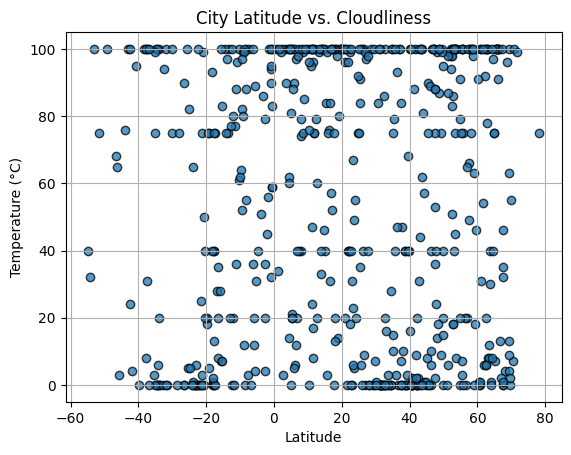

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='k', alpha=0.75, linewidth=1)


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudliness')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

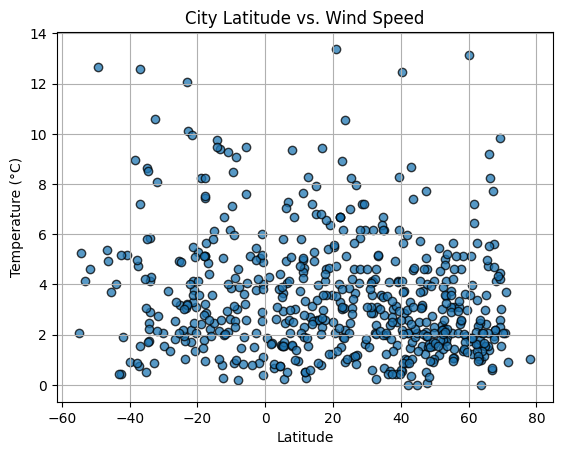

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='k', alpha=0.75, linewidth=1)


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Create the regression line
    reg_line = slope * x_values + intercept
    
    # Plot data points
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75, linewidth=1)
    
    # Plot regression line
    plt.plot(x_values, reg_line, 'r', label=f'Y = {slope:.2f}X + {intercept:.2f}')
    
    # Annotate linear regression equation and r^2 value
    plt.annotate(f'Y = {slope:.2f}X + {intercept:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')
    plt.annotate(f'$R^2$ = {r_value**2:.2f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='red')
    
    # Set title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show grid
    plt.grid(True)
    
    # Print r^2 value
    print(f'The r^2-value is: {r_value**2:.2f}')
    
    # Show plot
    plt.show()



In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,280.46,82,35,5.61,RU,1723080263
1,albany,42.6001,-73.9662,292.55,67,2,1.47,US,1723080264
2,bereznik,62.8551,42.7072,287.48,74,100,1.56,RU,1723080265
4,pointe-du-lac,46.2869,-72.6845,294.10,73,0,1.54,CA,1723080267
6,vila franca do campo,37.7167,-25.4333,296.38,89,47,3.04,PT,1723080269


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,chonchi,-42.6128,-73.8092,277.71,97,24,0.45,CL,1723080266
5,afaahiti,-17.7500,-149.2833,300.08,82,13,7.46,PF,1723080194
8,blackmans bay,-43.0167,147.3167,285.78,68,100,0.45,AU,1723080271
12,port-aux-francais,-49.3500,70.2167,273.77,97,100,12.68,TF,1723080276
13,fale old settlement,-9.3852,-171.2468,301.07,70,82,8.48,TK,1723080277


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.49


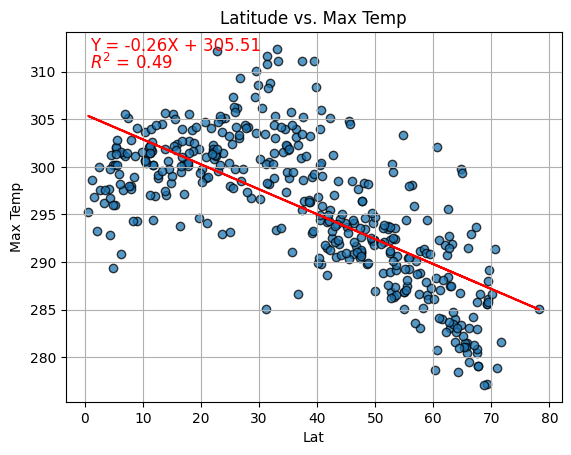

In [19]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Lat', 'Max Temp', 'Latitude vs. Max Temp')

The r^2-value is: 0.59


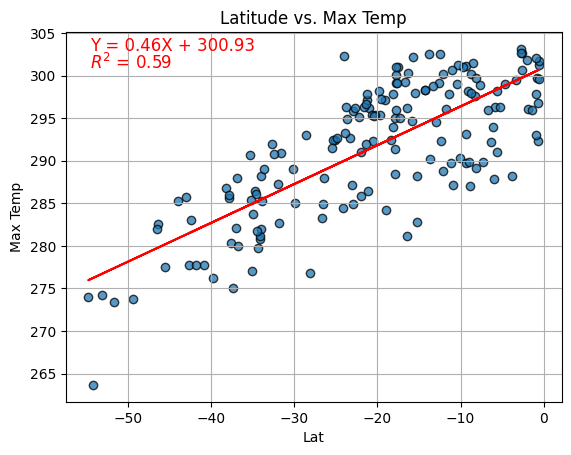

In [20]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Lat', 'Max Temp', 'Latitude vs. Max Temp')

**Discussion about the linear relationship:** 

For Northern Hemisphere - there is a negative corelation. With increase in Latitude, temperature decreases

For Southern Hemisphere - there is a positive corelation. With increase in Latitude, temperature increases


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00


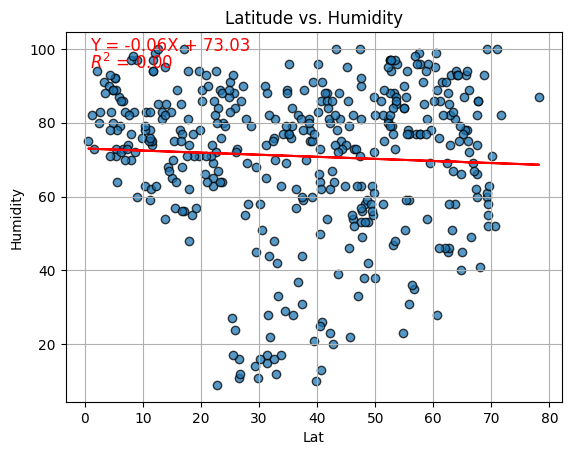

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Lat', 'Humidity', 'Latitude vs. Humidity')

The r^2-value is: 0.00


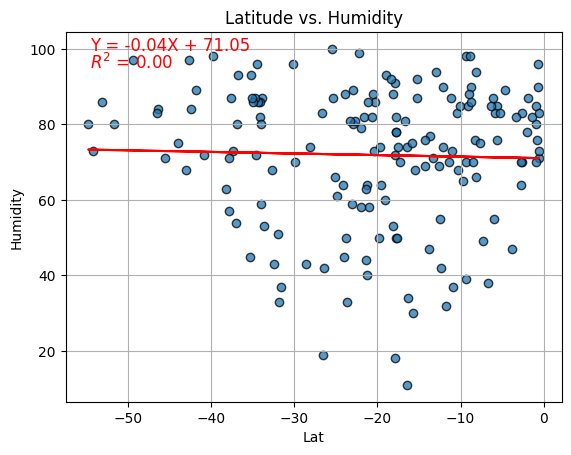

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Lat', 'Humidity', 'Latitude vs. Humidity')

**Discussion about the linear relationship:** 

For Northern Hemisphere - there is a slight negative corelation. With increase in Latitude, humidity decreases slightly

For Southern Hemisphere - there is a neutral corelation. With increase in Latitude, temperature can increase or decrease or remain same

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.01


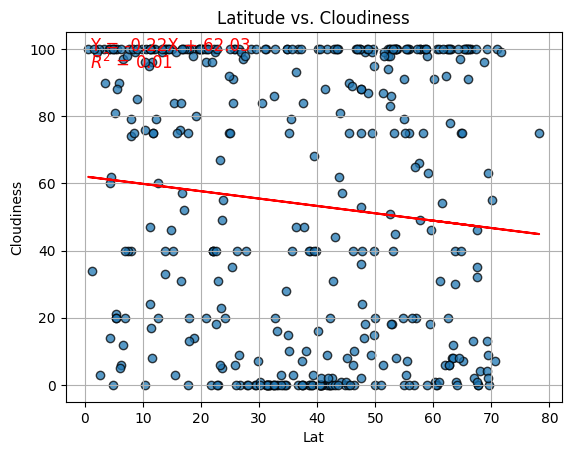

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Lat', 'Cloudiness', 'Latitude vs. Cloudiness')

The r^2-value is: 0.01


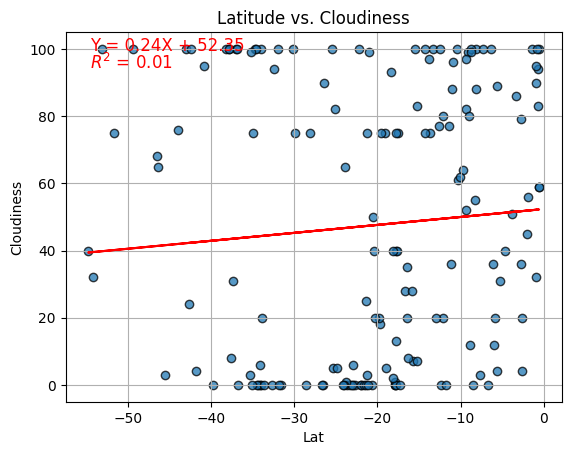

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Lat', 'Cloudiness', 'Latitude vs. Cloudiness')

**Discussion about the linear relationship:** 

For Northern Hemisphere - there is a moderate negative corelation. With increase in Latitude, cloudiness decreases moderately.

For Southern Hemisphere - there is a moderate negative corelation. With increase in Latitude, cloudiness decreases moderately.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01


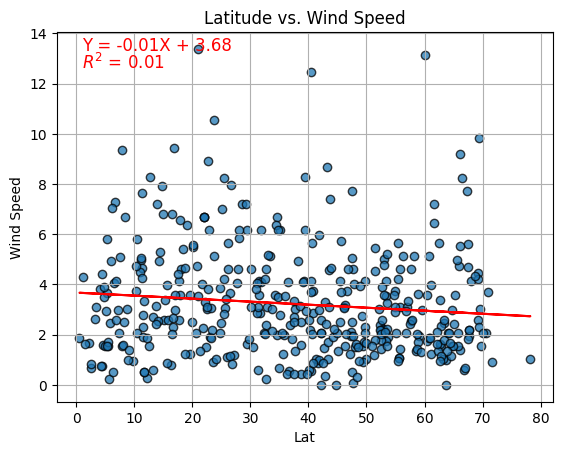

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Lat', 'Wind Speed', 'Latitude vs. Wind Speed')

The r^2-value is: 0.00


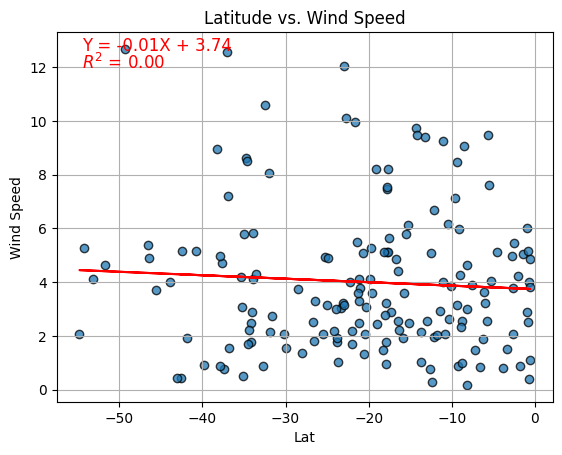

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Lat', 'Wind Speed', 'Latitude vs. Wind Speed')

**Discussion about the linear relationship:** 

For Northern Hemisphere - there is a slight positive corelation. With increase in Latitude, wind speed increases slightly

For Southern Hemisphere - there is a slight negative corelation. With increase in Latitude, windspeed decreases slightly